In [5]:
#Import the dataset

import pandas as pd

df = pd.read_excel('Registos_Incendios_SGIF_2011_2020.xlsx', sheet_name = 'SGIF_2011_2020')
df.head()

Codigo_SGIF  Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  AreaMato_ha  \
0      DM2111           368  2011    1    1    17         0.0        0.010   
1      BL4112          1236  2011    1    9    22         0.0        0.000   
2      DM3111           820  2011    1   15    17         0.0        0.000   
3      BL2111          1977  2011    1   18    22         0.0        0.001   
4      DM2113          7930  2011    1   19    17         0.0        0.005   

   AreaAgric_ha  AreaTotal_ha  ...       ISI         DC       DMC       FFMC  \
0       0.00000       0.01000  ...  0.291930   4.092373  0.653638  54.525424   
1       0.00200       0.00200  ...  0.013831   1.835452  0.367371  32.001278   
2       0.00001       0.00001  ...  1.171990   9.658571  1.573768  74.889775   
3       0.00000       0.00100  ...  0.248910  12.477199  0.762519  51.102608   
4       0.00000       0.00500  ...  0.008092   3.968661  0.508191  32.290416   

        BUI  CodCausa     TipoCausa  \
0  0.934234     145.0    Negligente   
1  0.489703     610.0  Desconhecida   
2  2.236498     124.0    Negligente   
3  1.322920     124.0    Negligente   
4  0.769912       NaN           NaN   

                                          GrupoCausa  \
0                            Uso do fogo - Fogueiras   
1                                     Indeterminadas   
2  Queimas amontoados de sobrantes florestais ou ...   
3  Queimas amontoados de sobrantes florestais ou ...   
4                                                NaN   

                        DescricaoCausa FonteAlerta  
0                   Fogueiras - Outras   Populares  
1      Indeterminadas - Prova material   Populares  
2  Queima de amontoados - Borralheiras   Populares  
3  Queima de amontoados - Borralheiras   Populares  
4                                  NaN   Populares  

[5 rows x 41 columns]

In [6]:
#Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177129 entries, 0 to 177128
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Codigo_SGIF                   177129 non-null  object        
 1   Codigo_ANEPC                  177129 non-null  int64         
 2   Ano                           177129 non-null  int64         
 3   Mes                           177129 non-null  int64         
 4   Dia                           177129 non-null  int64         
 5   Hora                          177129 non-null  int64         
 6   AreaPov_ha                    177129 non-null  float64       
 7   AreaMato_ha                   177129 non-null  float64       
 8   AreaAgric_ha                  177129 non-null  float64       
 9   AreaTotal_ha                  177129 non-null  float64       
 10  ClasseArea                    177129 non-null  object        
 11  DataHoraAlert

In [8]:
#Get all columns

print(df.columns.tolist())

['Codigo_SGIF', 'Codigo_ANEPC', 'Ano', 'Mes', 'Dia', 'Hora', 'AreaPov_ha', 'AreaMato_ha', 'AreaAgric_ha', 'AreaTotal_ha', 'ClasseArea', 'DataHoraAlerta', 'DataHora_PrimeiraIntervencao', 'DataHora_Extincao', 'Duracao_Horas', 'IncSup24horas', 'DTCCFR', 'Distrito', 'Concelho', 'Freguesia', 'Local', 'RNAP', 'RNMPF', 'X_Militar', 'Y_Militar', 'Latitude', 'Longitude', 'X_ETRS89', 'Y_ETRS89', 'DSR', 'FWI', 'ISI', 'DC', 'DMC', 'FFMC', 'BUI', 'CodCausa', 'TipoCausa', 'GrupoCausa', 'DescricaoCausa', 'FonteAlerta']


1-	How do fire occurrences vary across different months and years? Are there certain months or seasons with higher fire occurrences? Can we identify what were the larger fires?

- Line Plot of Fire Occurrences Over Time: Plot the number of fire occurrences over different months and years. This can help identify trends and patterns over time.

- Heatmap of Fire Occurrences: Create a heatmap where the x-axis represents the months, the y-axis represents the years, and the color intensity represents the number of fire occurrences. This visualization can help identify seasonal patterns and hotspots.

- Boxplot of Fire Occurrences by Month: Create a boxplot where each box represents the distribution of fire occurrences for each month. This can help identify if certain months have higher variability in fire occurrences.

- Histogram of Fire Occurrences: Plot a histogram to visualize the distribution of fire occurrences across different sizes (e.g., areas burned). This can help identify larger fires based on their area.

- Scatter Plot of Fire Occurrences by Area: Create a scatter plot where each point represents a fire occurrence, and the x-axis represents the area burned. This can help identify larger fires visually.

- Bar Plot of Fire Occurrences by Year: Plot a bar chart showing the total number of fire occurrences for each year. This can help identify if certain years had significantly higher fire activity.

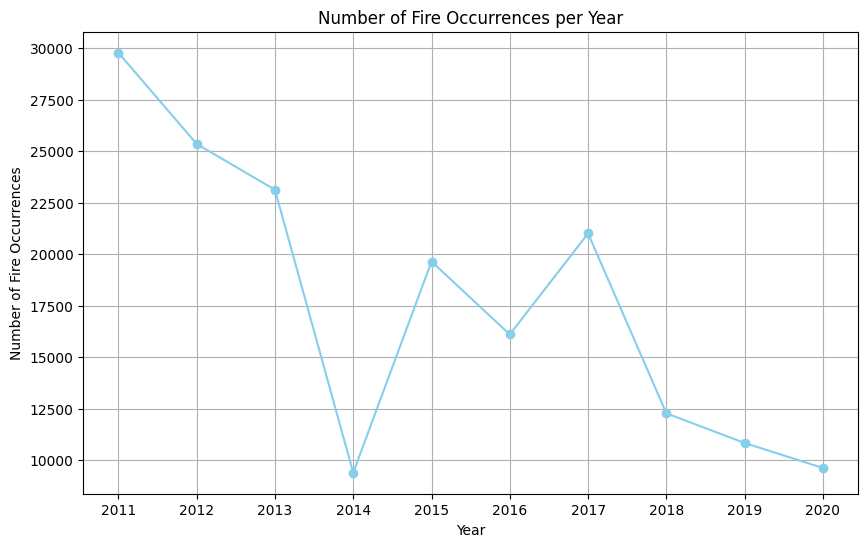

In [9]:
#Fire Ocurrences per Year
import matplotlib.pyplot as plt

#Count the number of fires per year
fires_per_year = df.groupby('Ano').size()

#Extract all unique years from the dataset
years = df['Ano'].unique()

#Plot the fires per year
plt.figure(figsize=(10, 6))
fires_per_year.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Fire Occurrences')
plt.title('Number of Fire Occurrences per Year')
plt.xticks(ticks=years)
plt.grid(True)
plt.show()

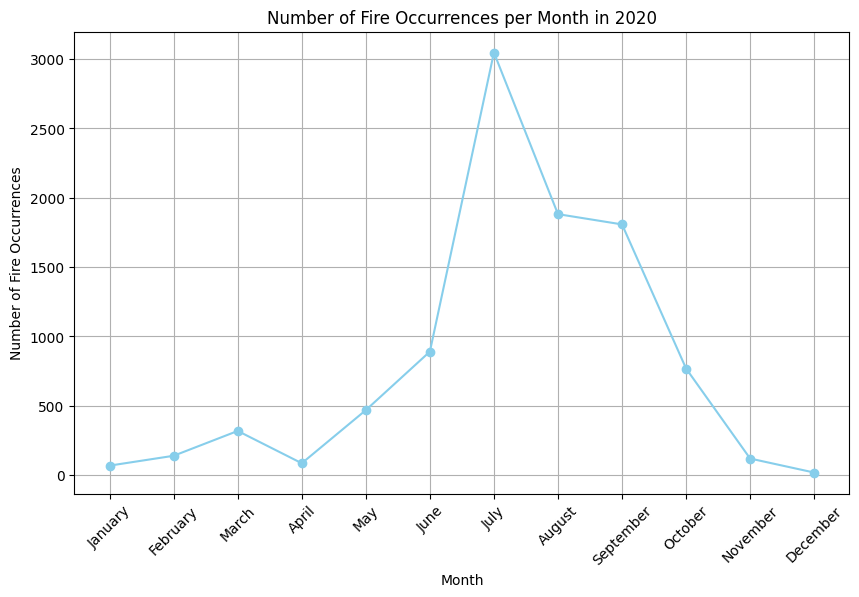

In [10]:
#Fire Ocurrences per month in a certain year
import matplotlib.pyplot as plt
import calendar

# Define a specific year to analyze
specific_year = 2020

# Filter data for the specific year
df_specific_year = df[df['Ano'] == specific_year]

# Count the number of fire occurrences per month for the specific year
fires_per_month_specific_year = df_specific_year['Mes'].value_counts().sort_index()

# Ensure all months (1 to 12) are included
all_months = range(1, 13)
fires_per_month_specific_year = fires_per_month_specific_year.reindex(all_months, fill_value=0)

# Get month names
month_names = [calendar.month_name[i] for i in all_months]

# Plot the number of fire occurrences per month for the specific year using a line plot
plt.figure(figsize=(10, 6))
fires_per_month_specific_year.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Fire Occurrences')
plt.title(f'Number of Fire Occurrences per Month in {specific_year}')
plt.xticks(ticks=all_months, labels=month_names, rotation=45)
plt.grid(True)
plt.show()

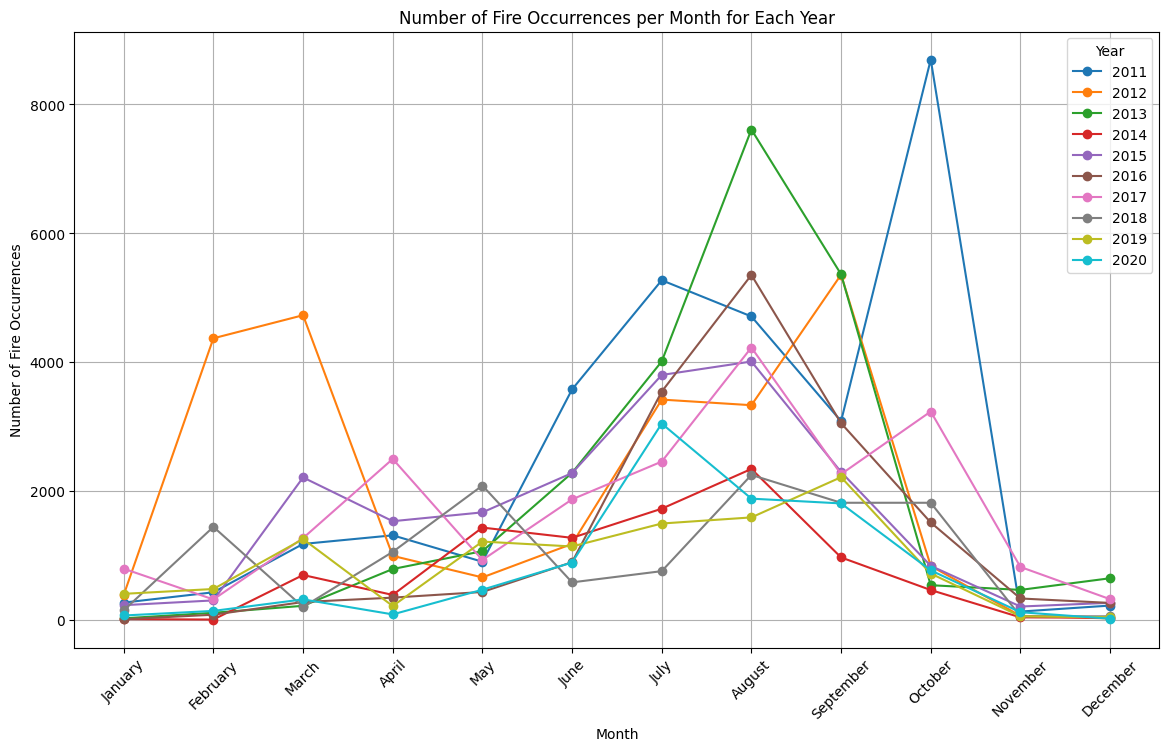

In [11]:
#Fire Occurrences per month for all the years
import matplotlib.pyplot as plt
import calendar

# Pivot the table to get months as columns and years as rows
fires_per_month_year = df.pivot_table(index='Ano', columns='Mes', values='Codigo_SGIF', aggfunc='size', fill_value=0)

# Get month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot the number of fire occurrences per month for each year
plt.figure(figsize=(14, 8))

for year in fires_per_month_year.index:
    plt.plot(month_names, fires_per_month_year.loc[year], marker='o', linestyle='-', label=year)

plt.xlabel('Month')
plt.ylabel('Number of Fire Occurrences')
plt.title('Number of Fire Occurrences per Month for Each Year')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

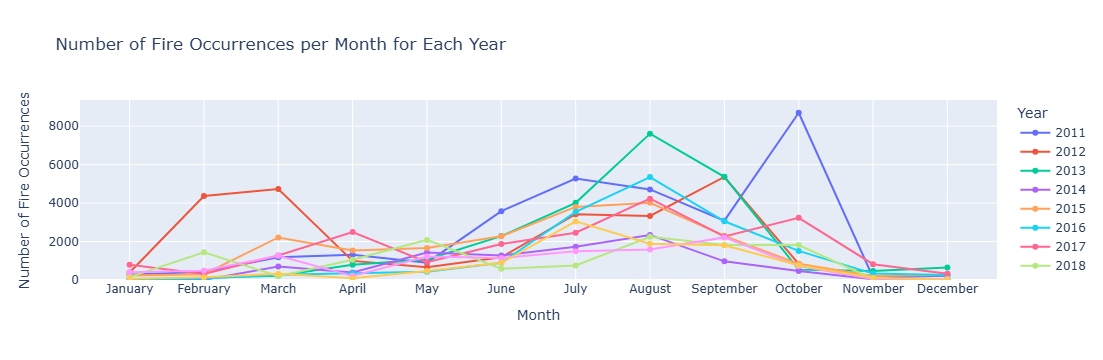

In [12]:
#Fire Occurrences per month for all the years (Interactive plot)
import plotly.graph_objects as go
import calendar

# Pivot the table to get months as columns and years as rows
fires_per_month_year = df.pivot_table(index='Ano', columns='Mes', values='Codigo_SGIF', aggfunc='size', fill_value=0)

# Get month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Create an interactive plot
fig = go.Figure()

for year in fires_per_month_year.index:
    fig.add_trace(go.Scatter(
        x=month_names,
        y=fires_per_month_year.loc[year],
        mode='lines+markers',
        name=str(year)
    ))

fig.update_layout(
    title='Number of Fire Occurrences per Month for Each Year',
    xaxis_title='Month',
    yaxis_title='Number of Fire Occurrences',
    xaxis=dict(tickmode='array', tickvals=month_names),
    yaxis=dict(rangemode='tozero'),
    legend_title='Year',
    hovermode='x unified'
)

fig.show()


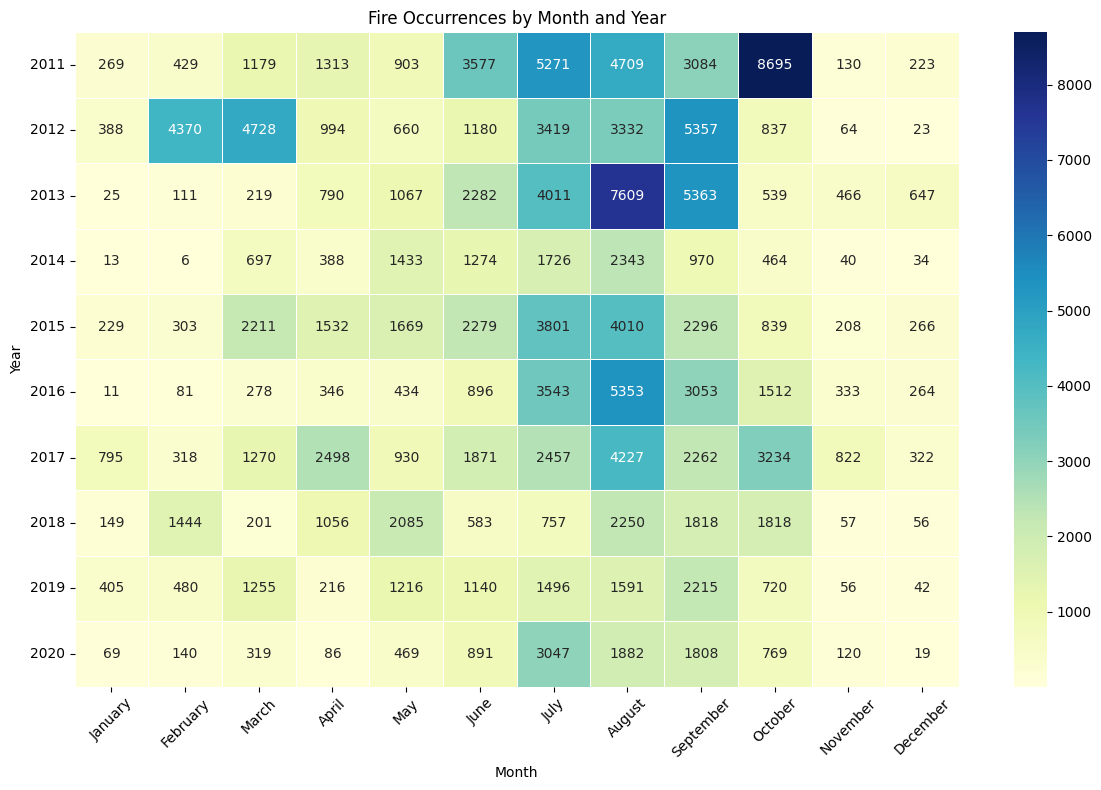

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Load the dataset
df = pd.read_excel('Registos_Incendios_SGIF_2011_2020.xlsx', sheet_name='SGIF_2011_2020')

# Pivot the data to get counts of fire occurrences for each month and year
fires_per_month_year = df.pivot_table(index='Ano', columns='Mes', values='Codigo_SGIF', aggfunc='size', fill_value=0)

# Convert month numbers to month names
fires_per_month_year.columns = [calendar.month_name[month] for month in fires_per_month_year.columns]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fires_per_month_year, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Fire Occurrences by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


2-	How long do fires typically last from start to extinction? Is there a correlation between the time of first intervention and the duration of the fire?

3-	What are the most common causes of fires? Is there a variation in fire duration and occurrence based on different causes?

4-	Can we identify clusters of fire events based on their characteristics (e.g. cause, location, duration)? Are there distinct patterns in fire occurrences that can be grouped together?

5-	How effective are interventions in controlling the duration of fires? Do faster response times correlate with shorter fire durations?